In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/bmi.csv')

In [3]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
data.Gender.value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [5]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True, dtype=int)


In [6]:
data.head()

,Height,Weight,Index,Gender_Male
0,174,96,4,1
1,189,87,2,1
2,185,110,4,0
3,195,104,3,0
4,149,61,3,1


<Axes: xlabel='Index', ylabel='Height'>

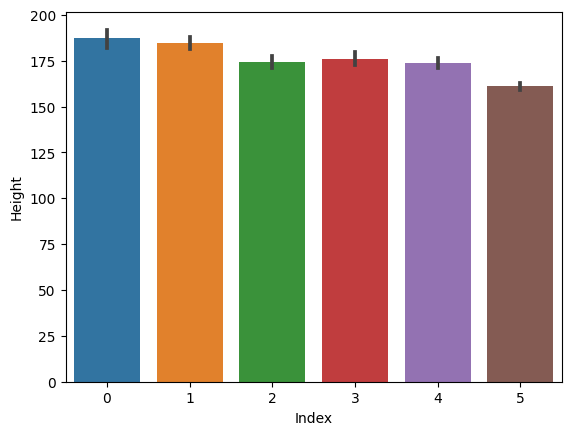

In [7]:
sns.barplot(y='Height', x='Index', data=data)

<Axes: xlabel='Index', ylabel='Weight'>

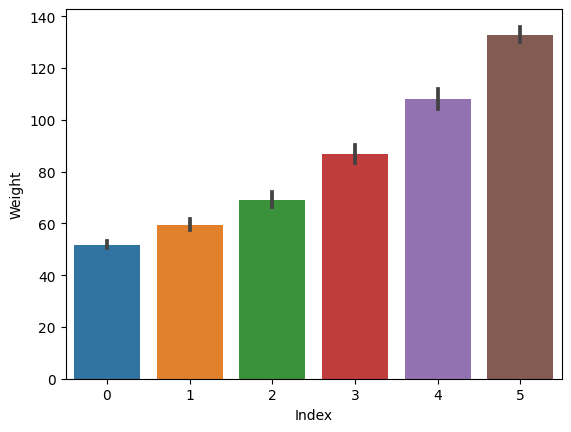

In [8]:
sns.barplot(y='Weight', x='Index', data=data)

<Axes: xlabel='Index', ylabel='Gender_Male'>

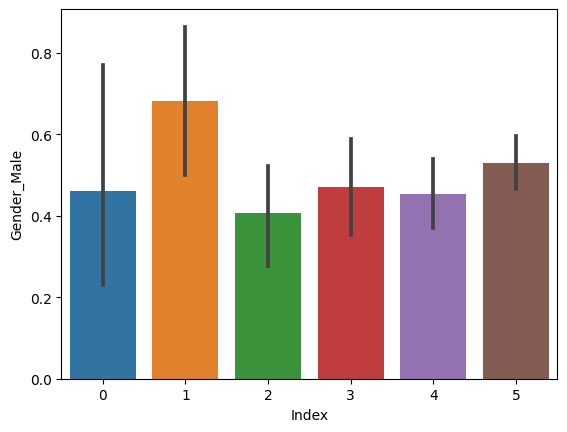

In [9]:
sns.barplot(x='Index', y='Gender_Male', data=data)

In [10]:
data.corr()['Index'].sort_values()

Height        -0.422223
Gender_Male    0.028786
Weight         0.804569
Index          1.000000
Name: Index, dtype: float64

In [11]:
X = data.drop('Index', axis=1)

In [12]:
y = data['Index']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaled_x_train = scaler.fit_transform(X_train)


In [18]:
scaled_x_test = scaler.fit(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_model = LogisticRegression()

In [21]:
log_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
preds = log_model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [24]:
accuracy_score(y_test, preds)

0.7533333333333333

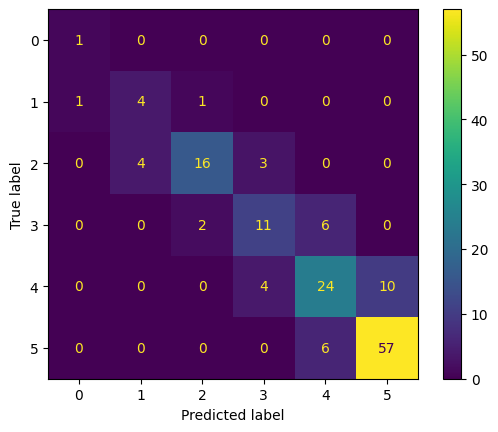

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.50      0.67      0.57         6
           2       0.84      0.70      0.76        23
           3       0.61      0.58      0.59        19
           4       0.67      0.63      0.65        38
           5       0.85      0.90      0.88        63

    accuracy                           0.75       150
   macro avg       0.66      0.75      0.69       150
weighted avg       0.76      0.75      0.75       150



In [27]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid_model = GridSearchCV(log_model, param_grid={'C':C, 'penalty':penalty})

In [30]:
grid_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [31]:
preds = grid_model.predict(X_test)

In [32]:
grid_model.best_params_

{'C': 21.544346900318832, 'penalty': 'l2'}

In [33]:
accuracy_score(y_test, preds)

0.7666666666666667

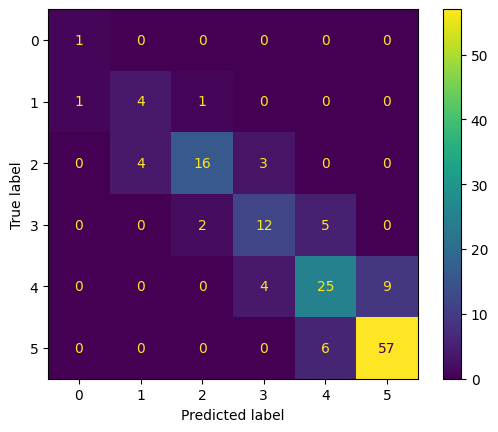

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
tree_model = DecisionTreeClassifier()

In [37]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
preds = tree_model.predict(X_test)

In [39]:
accuracy_score(y_test, preds)

0.8266666666666667